In [ ]:
### Experiment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
null_values = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)).reset_index()
null_values.columns = ['column_name','values']
percent = pd.DataFrame(df_train.isnull().sum().sort_values(ascending = False)/len(df_train)*100).reset_index()
percent.columns = ['column_name','percent']
percent_1 = pd.DataFrame(percent.loc[:,'percent'])

null_df = pd.concat([null_values,percent_1],axis = 1)
null_df

,column_name,values,percent
0,Credit_History,50,8.143322
1,Self_Employed,32,5.211726
2,LoanAmount,22,3.583062
3,Dependents,15,2.442997
4,Loan_Amount_Term,14,2.280130
5,Gender,13,2.117264
6,Married,3,0.488599
7,Loan_Status,0,0.000000
8,Property_Area,0,0.000000
9,CoapplicantIncome,0,0.000000


In [4]:
df_train = df_train.dropna()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [6]:
df_train['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [7]:
## continous variables:
features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
#normalized_df = df_train[features]
#normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()

In [8]:
normalized_df = df_train[features]
normalized_df = normalized_df - normalized_df.mean()/normalized_df.std()

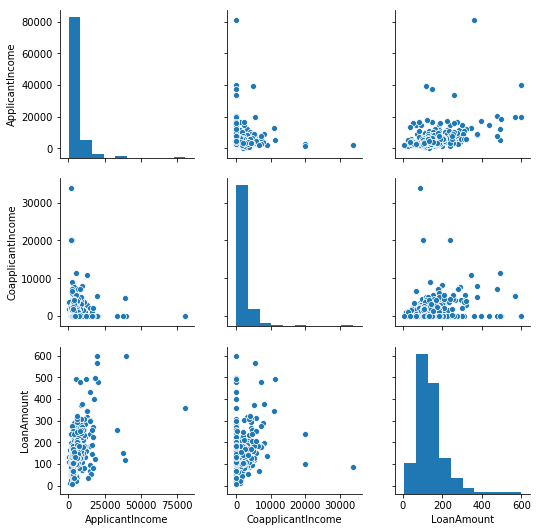

In [9]:
sns.pairplot(normalized_df)

In [10]:

df_train['Married'] = df_train['Married'].map({'Yes': 1,'No': 0})
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1,'No': 0})
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1,'N': 0})
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',60.0:'5 Years',12.0:'1 Year'})

In [11]:
df_train = df_train.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [12]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
gen = pd.get_dummies(df_train['Gender'],drop_first = True)
dep = pd.get_dummies(df_train['Dependents'],drop_first = True)
ed = pd.get_dummies(df_train['Education'],drop_first = True)
lat = pd.get_dummies(df_train['Loan_Amount_Term'],drop_first = True)
pa = pd.get_dummies(df_train['Property_Area'],drop_first = True)

df_train = pd.concat([df_train,gen,dep,ed,lat,pa],axis = 1)

In [13]:
df_train = df_train.drop(['Gender','Dependents','Education','Loan_Amount_Term','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [14]:
df_train = pd.concat([df_train,normalized_df],axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 23 columns):
Loan_ID              480 non-null object
Married              480 non-null int64
Self_Employed        480 non-null int64
Credit_History       480 non-null float64
Loan_Status          480 non-null int64
Male                 480 non-null uint8
dep_None             480 non-null uint8
dep_One              480 non-null uint8
dep_Two              480 non-null uint8
Not Graduate         480 non-null uint8
15 Years             480 non-null uint8
20 Years             480 non-null uint8
25 Years             480 non-null uint8
3 Years              480 non-null uint8
30 Years             480 non-null uint8
40 Years             480 non-null uint8
5 Years              480 non-null uint8
7 Years              480 non-null uint8
Semiurban            480 non-null uint8
Urban                480 non-null uint8
ApplicantIncome      480 non-null float64
CoapplicantIncome    480 non-null float64
LoanAmou

In [16]:
depend = ['dep_None','dep_One','dep_Two']

df_train[depend].head()

,dep_None,dep_One,dep_Two
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1


In [17]:
X = df_train.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df_train['Loan_Status']

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
log = LogisticRegression()
rfe = RFE(log,22)
rfe1 = rfe.fit(X,y)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
col = X.columns[rfe.support_]
X_train = X[col]

In [21]:
[variance_inflation_factor(X_train.values, j) for j in range(1, X_train.shape[1])]

[1.2368032092755752,
 6.898675368887628,
 6.5453419361553395,
 8.011373053486293,
 3.0246001154421647,
 3.0835633699848772,
 1.353168315945118,
 2.9958010896065215,
 1.1439466263256566,
 1.4789150412558585,
 1.1323069169780242,
 23.87319230972921,
 1.6026533001184093,
 1.1335317473465745,
 1.181581341962986,
 2.4159881462468604,
 2.1969286999432462,
 2.7903106379809652,
 1.5587870887660187,
 6.521005580147469]

In [22]:
import statsmodels.api as sm
model = sm.GLM(y,sm.add_constant(X_train[col]),family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      458
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -207.77
Date:                Sat, 09 Mar 2019   Deviance:                       415.54
Time:                        01:30:14   Pearson chi2:                     464.
No. Iterations:                    21   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.8017   2.76e+04      0.001      0.999    -5.4e+04    5.41e+04
Married               0.4556      0.303      1.506      0.132      -0.137       1.049
Self_Employed        -0.1998      0.364     -0.549      0.583      -0.913       0.514
Credit_History        3.7387      0.443      8.434      0.000       2.870       4.608
Male                  0.3095      0.342      0.906      0.365      -0.360       0.979
dep_None             -0.1953      0.500     -0.391      0.696      -1.174       0.784
dep_One              -0.4336      0.549     -0.789      0.430      -1.511       0.643
dep_Two               0.2213      0.557      0.397      0.691      -0.871       1.313
Not Graduate         -0.4595      0.315     -1.461      0.144      -1.076       0.157
15 Years            -19.7654   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
20 Years            -22.3658   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
25 Years            -21.3146   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
3 Years             -44.5506   4.38e+04     -0.001      0.999   -8.58e+04    8.57e+04
30 Years            -20.2771   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
40 Years            -22.2945   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
5 Years               1.3947   4.37e+04   3.19e-05      1.000   -8.56e+04    8.56e+04
7 Years             -21.2261   2.76e+04     -0.001      0.999   -5.41e+04     5.4e+04
Semiurban             1.1517      0.319      3.613      0.000       0.527       1.776
Urban                 0.0890      0.308      0.289      0.773      -0.515       0.693
ApplicantIncome   -2.616e-06   3.18e-05     -0.082      0.934   -6.49e-05    5.97e-05
CoapplicantIncome -6.058e-05   4.45e-05     -1.361      0.173      -0.000    2.66e-05
LoanAmount           -0.0027      0.002     -1.470      0.141      -0.006       0.001
=====================================================================================
"""

In [23]:
X1 = df_train.drop(['Loan_ID','Loan_Status','3 Years','25 Years','20 Years','dep_One','5 Years','15 Years','7 Years','dep_Two','Not Graduate','Self_Employed','Male','Urban','30 Years','dep_None','CoapplicantIncome','ApplicantIncome','LoanAmount'],axis = 1)
y = df_train['Loan_Status']

In [24]:
log1 = LogisticRegression()
rfe2 = RFE(log1,4)
rfe2 = rfe2.fit(X1,y)
print(rfe2.support_)
print(rfe2.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [25]:
#credit history-40 years-3 years(0.999)(removed)- semiurban - 25 years(0.185)(removed)-20 years(0.288)(removed)-
#dep_one(0.132)(removed)-5 years(0.999)(removed)- 15 years(0.345)(removed)-7 years(0.484)(removed)- dep_Two(removed)
# Not Graduate(removed)-Self_Employed(removed)- Male(removed)-Urban(removed)-30 Years(removed)-dep_None(removed)
#LoanAmount(abit high but keeping it.)- CoapplicantIncome(removed)-ApplicantIncome(removed).

In [26]:
## again running this model by removing loan amount now.

In [27]:
col1 = X1.columns[rfe2.support_]
X_train1 = X1[col1]

In [28]:
[variance_inflation_factor(X_train1.values, j) for j in range(0, X_train1.shape[1])]

[2.326792694327453, 2.67416478384626, 1.021479542289795, 1.5833876451570645]

In [29]:
model1 = sm.GLM(y,sm.add_constant(X_train1[col1]),family = sm.families.Binomial())
model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  480
Model:                            GLM   Df Residuals:                      475
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -220.06
Date:                Sat, 09 Mar 2019   Deviance:                       440.13
Time:                        01:33:38   Pearson chi2:                     478.
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.9046      0.459     -6.334      0.000      -3.803      -2.006
Married            0.5512      0.245      2.253      0.024       0.072       1.031
Credit_History     3.6462      0.428      8.515      0.000       2.807       4.485
40 Years          -1.7641      0.719     -2.455      0.014      -3.172      -0.356
Semiurban          0.9019      0.264      3.416      0.001       0.384       1.419
==================================================================================
"""

In [30]:
### testing on the training set only:

#X_train1 = X_train[col]
X_test1 = X1[col1]

In [34]:
# Predicted probabilities
log21 = LogisticRegression()
log21.fit(X_train1, y)
y_pred = log21.predict_proba(X_test1)

In [35]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y)

In [36]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [37]:
y_pred_1.shape

(480, 1)

In [38]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'status_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Loan_Status','status_Prob'], axis=1)
y_pred_final.head()

,Loan_Status,status_Prob
0,0,0.774085
1,1,0.774085
2,1,0.774085
3,1,0.688869
4,1,0.774085


In [39]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.status_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Loan_Status,status_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.774085,1,1,1,1,1,1,1,1,0,0
1,1,0.774085,1,1,1,1,1,1,1,1,0,0
2,1,0.774085,1,1,1,1,1,1,1,1,0,0
3,1,0.688869,1,1,1,1,1,1,1,0,0,0
4,1,0.774085,1,1,1,1,1,1,1,1,0,0


In [40]:
from sklearn import metrics

In [42]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','false positive rate'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Loan_Status, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    fpr = 1-speci
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,fpr]
print(cutoff_df)

     prob  accuracy     sensi     speci  false positive rate
0.0   0.0  0.691667  0.000000  1.000000             0.000000
0.1   0.1  0.697917  0.020270  1.000000             0.000000
0.2   0.2  0.777083  0.297297  0.990964             0.009036
0.3   0.3  0.808333  0.425676  0.978916             0.021084
0.4   0.4  0.808333  0.425676  0.978916             0.021084
0.5   0.5  0.812500  0.445946  0.975904             0.024096
0.6   0.6  0.814583  0.452703  0.975904             0.024096
0.7   0.7  0.745833  0.635135  0.795181             0.204819
0.8   0.8  0.562500  0.864865  0.427711             0.572289
0.9   0.9  0.308333  1.000000  0.000000             1.000000


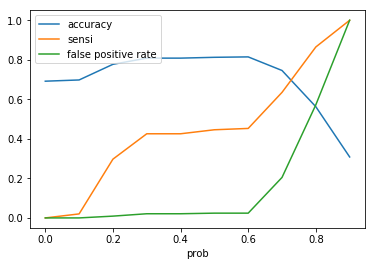

In [44]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','false positive rate'])

In [73]:
y_pred_final['final_predicted'] = y_pred_final.status_Prob.map( lambda x: 1 if x > 0.6 else 0)

In [74]:
y_pred_final.head()

,Loan_Status,status_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.774085,1,1,1,1,1,1,1,1,0,0,1
1,1,0.774085,1,1,1,1,1,1,1,1,0,0,1
2,1,0.774085,1,1,1,1,1,1,1,1,0,0,1
3,1,0.688869,1,1,1,1,1,1,1,0,0,0,1
4,1,0.774085,1,1,1,1,1,1,1,1,0,0,1


In [75]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Loan_Status, y_pred_final.final_predicted)

0.8145833333333333

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Loan_Status,y_pred_final.final_predicted)

In [77]:
fpr

array([0.       , 0.5472973, 1.       ])

In [78]:
tpr

array([0.        , 0.97590361, 1.        ])

In [79]:
thresholds

array([2, 1, 0], dtype=int64)

In [80]:
auc_score = metrics.roc_auc_score(y_pred_final.Loan_Status,y_pred_final.final_predicted)
auc_score

0.714303158580267

(0.0, 1.05)

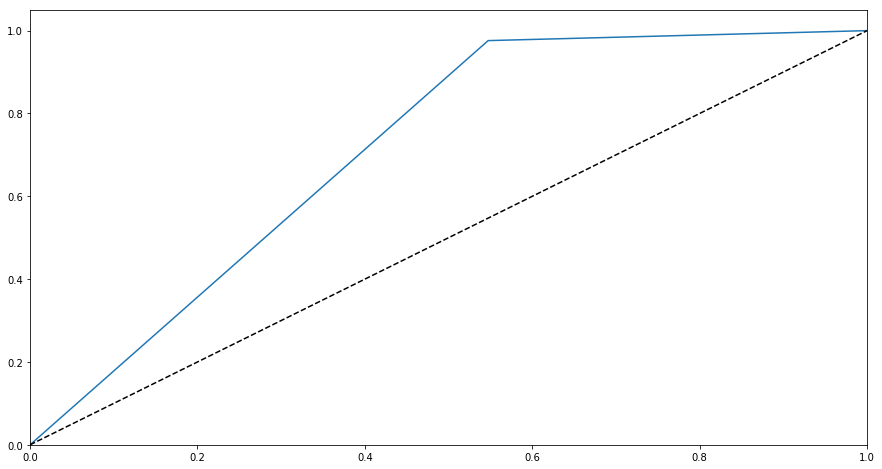

In [81]:
plt.figure(figsize=(15, 8))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [82]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 4 columns):
Married           480 non-null int64
Credit_History    480 non-null float64
40 Years          480 non-null uint8
Semiurban         480 non-null uint8
dtypes: float64(1), int64(1), uint8(2)
memory usage: 12.2 KB


In [83]:
### working on test data:

In [84]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [85]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [86]:
df_test = df_test.dropna()

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              289 non-null object
Gender               289 non-null object
Married              289 non-null object
Dependents           289 non-null object
Education            289 non-null object
Self_Employed        289 non-null object
ApplicantIncome      289 non-null int64
CoapplicantIncome    289 non-null int64
LoanAmount           289 non-null float64
Loan_Amount_Term     289 non-null float64
Credit_History       289 non-null float64
Property_Area        289 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 29.4+ KB


In [88]:
## continous variables:
features1 = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
normalized_df1 = df_test[features1]
normalized_df1 = normalized_df1 - normalized_df1.mean()/normalized_df1.std()

In [89]:
df_test['Loan_Amount_Term'].value_counts()

360.0    248
180.0     19
480.0      7
300.0      6
240.0      2
84.0       2
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [90]:

df_test['Married'] = df_test['Married'].map({'Yes': 1,'No': 0})
df_test['Self_Employed'] = df_test['Self_Employed'].map({'Yes': 1,'No': 0})
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].map({360.0 : "30 Years",180.0:'15 Years',480.0:'40 Years',300.0:'25 Years',84.0:'7 Years',240.0:'20 Years',120.0:'10 Years',36.0:'3 Years',350.0:'29 Years',12.0:'1 Year',6.0:'half Year'})

In [91]:
#df_test = df_test.replace({'Dependents':{'0':'dep_None','2':'dep_Two','1':'dep_One','3+':'dep_More_than_three'}})

In [92]:
## dummy variables(gender,dependents,education,Loan_Amount_Term,Property_Area)
gen1 = pd.get_dummies(df_test['Gender'],drop_first = True)
#dep1 = pd.get_dummies(df_test['Dependents'],drop_first = True)
ed1 = pd.get_dummies(df_test['Education'],drop_first = True)
#lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
pa1 = pd.get_dummies(df_test['Property_Area'],drop_first = True)

df_test = pd.concat([df_test,gen1,ed1,pa1],axis = 1)

In [93]:
#df_test = df_test.drop(['Gender','Dependents','Education','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)


In [94]:
lat1 = pd.get_dummies(df_test['Loan_Amount_Term'],drop_first = True)
df_test = pd.concat([df_test,lat1],axis = 1)

In [95]:
df_test = pd.concat([df_test,normalized_df1],axis = 1)
df_test = df_test.drop(['Gender','Dependents','Education','Property_Area','ApplicantIncome','CoapplicantIncome','LoanAmount'],axis = 1)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 19 columns):
Loan_ID             289 non-null object
Married             289 non-null int64
Self_Employed       289 non-null int64
Loan_Amount_Term    289 non-null object
Credit_History      289 non-null float64
Male                289 non-null uint8
Not Graduate        289 non-null uint8
Semiurban           289 non-null uint8
Urban               289 non-null uint8
10 Years            289 non-null uint8
15 Years            289 non-null uint8
20 Years            289 non-null uint8
25 Years            289 non-null uint8
29 Years            289 non-null uint8
3 Years             289 non-null uint8
30 Years            289 non-null uint8
40 Years            289 non-null uint8
7 Years             289 non-null uint8
half Year           289 non-null uint8
dtypes: float64(1), int64(2), object(2), uint8(14)
memory usage: 17.5+ KB


In [96]:
X_test1.columns

Index(['Married', 'Credit_History', '40 Years', 'Semiurban'], dtype='object')

In [97]:
df_test.columns

Index(['Loan_ID', 'Married', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Male', 'Not Graduate', 'Semiurban', 'Urban',
       '10 Years', '15 Years', '20 Years', '25 Years', '29 Years', '3 Years',
       '30 Years', '40 Years', '7 Years', 'half Year'],
      dtype='object')

In [98]:
X_test2 = df_test.drop(['Loan_ID','Self_Employed','Male','Not Graduate','Loan_Amount_Term','Urban','10 Years','15 Years','20 Years','25 Years','29 Years','3 Years','30 Years','7 Years','half Year'],axis = 1)


In [99]:
y_predicted = log21.predict_proba(X_test2)

In [100]:
X_test2.shape

(289, 4)

In [101]:
X_test1.shape

(480, 4)

In [105]:
# Converting y_pred to a dataframe which is an array
df1 = pd.DataFrame(y_predicted)
# Converting to column dataframe
df1 = df1.iloc[:,[1]]
df1.head()


,1
0,0.774085
1,0.774085
2,0.774085
3,0.688869
4,0.774085


In [106]:
df1= df1.rename(columns={ 1 : 'test_status_Prob'})

In [107]:
df1['Loan Status'] = df1.test_status_Prob.map( lambda x: 1 if x > 0.6 else 0)

In [108]:
df2 = pd.DataFrame(df1['Loan Status'])
df2.head()

,Loan Status
0,1
1,1
2,1
3,1
4,1


In [110]:
loan = pd.DataFrame(df_test['Loan_ID'])
loan.head()

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
4,LP001051
5,LP001054


In [112]:
# Removing index for both dataframes to append them side by side 
df2.reset_index(drop=True, inplace=True)
loan.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
final = pd.concat([loan,df2],axis=1)
final.head()

,Loan_ID,Loan Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001051,1
4,LP001054,1


In [117]:
prediction = pd.DataFrame(final, columns= ['Loan_ID','Loan Status']).to_csv('prediction.csv')